# Binary Search Tree

In diesem Notebook geht es darum, Schritt für Schritt einen binären
Suchbaum in Python zu implementieren.

In einer ersten Zelle werden alle erforderlichen Python Libraries für dieses Projekt improtiert.

In [4]:
import iplantuml
import pandas as pd

## UML Klassendiagramm

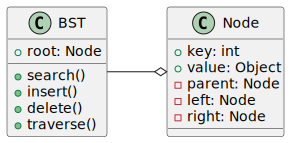

In [5]:
%%plantuml
@startuml
left to right direction
skinparam classSterotype ""

class Node {
    + key: int
    + value: Object
    - parent: Node
    - left: Node
    - right: Node

}

class BST {
    + root: Node
    + search()
    + insert()
    + delete()
    + traverse()
}

BST --o Node

@enduml

## Node

Die Implementierung eines Knotens für einen binären Suchbaum in Python findet sich in der folgenden Zelle.

In [1]:
class Node:
    def __init__(self, key,
                 value=None, parent=None, left=None, right=None):
        self.key = key
        self.value = value
        self.parent = parent
        self.left = left
        self.right = right

## Implementierung BST

Die Implementierung der Klasse BST erfolgt Schrittweise.

1. Implementierung als Klasse ohne Methoden
2. Implementierung der Methode `insert()`
3. Implementierung der Methode `search()`
4. Implementierung der Methode `delete()`
5. Implementierung der Mehtode `traverse()`

### Implementierung der Klasse BST ohne Methoden

In einem ersten Schritt wird die Klass BST nur mit einem Konstruktor implementiert.

In [3]:
class BST:
    def __init__(self, key = None, value = None):
        if key == None:
            self.root = None
        else:
            self.root = Node(key, value)

### Implementierung der Methode `insert()`

Obwohl die Datenstruktur binärer **Suchbaum** heisst, wird als erstes
die Methode `insert()` implementiert. Ohne diese Methode können der
Datenstruktur keine Knoten hinzugefügt werden. Ohne Knoten ist die
Datenstrukur sinnlos.

Bei der Implementierung ist an folgende Fälle zu denken:

1. Einfügen eines Knoten als Wurzelknoten;
2. einfügen eines Knoten mit einem Key kleiner als der Key des
   Vergleichsknotens in jenen Fällen, in denen der Vergleichsknoten noch
   keinen linken Kindknoten hat;
3. einfügen eines Knoten mit einem Key kleiner als der Key des
   Vergleichskontens in jenen Fällen, in denen der Vergleichskonten über
   einen linken Kindknoten verfügt;
4. einfügen eines Knoten mit einem Key grösser als der Key des
   Vergleichsknotens in jenen Fällen, in denen der Vergleichsknoten kein
   rechtes Kind hat sowie
5. einfügen eines Knoten mit einem Key grösser als der Key des
   Vergleichsknotens in jenen Fällen, in denen der Vergleichsknoten über
   ein rechtes Kind verfügt.

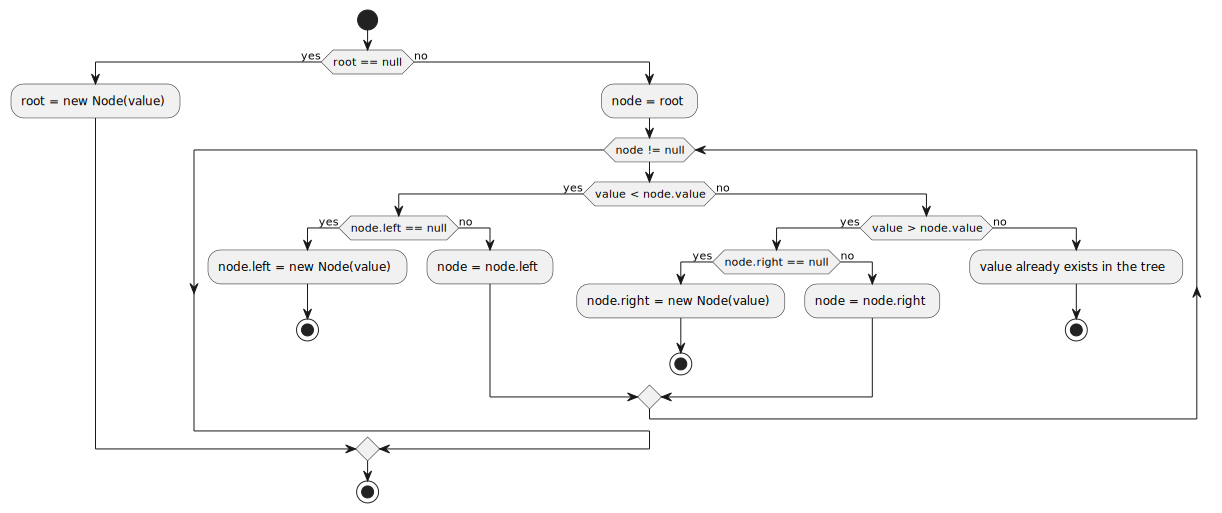

In [11]:
%%plantuml

@startuml
start

if (root == null) then (yes)
    :root = new Node(value);
else (no)
    :node = root;
    while (node != null)
        if (value < node.value) then (yes)
            if (node.left == null) then (yes)
                :node.left = new Node(value);
                stop
            else (no)
                :node = node.left;
            endif
        else (no)
            if (value > node.value) then (yes)
                if (node.right == null) then (yes)
                    :node.right = new Node(value);
                    stop
                else (no)
                    :node = node.right;
                endif
            else (no)
                :value already exists in the tree;
                stop
            endif
        endif
    endwhile
endif

stop
@enduml


In [ ]:
class BST:
    def __init__(self, root=None):
        self.root = root

    def insert(self, key, value=None, root=None):

        node = Node(key, value)

        if self.root is None:
            self.root = node
            return

        if root is None:
            ref = self.root

        if node.key <= ref.key and ref.left is None:
            ref.left = node
            node.parent    = ref
            return

        elif node.key <= ref.key:
            ref = ref.left
            return self.insert(key, value, root=ref)

        elif node.key > ref.key and ref.right is None:
            ref.right = node
            node.parent     = ref
            return

        else:
            ref = ref.right
            return self.insert(key, value, root=ref)

### Implementierung der Methode `search()`

Die Methode `search()` sucht nach einem Knoten mit einem gegebenen Key.
Sie gibt None zurück, wenn nichts gefunden wird, wenn der Key gefunden
wird gibt den Knoten zurück.  
In einem Flussdiagramm sieht die Methode `search()` folgendermassen aus:

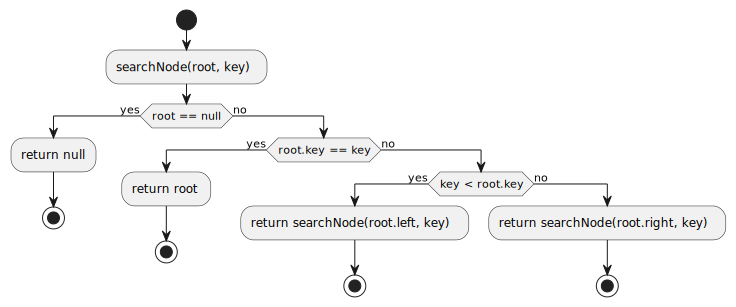

In [13]:
%%plantuml

@startuml
start

:searchNode(root, key);
if (root == null) then (yes)
    :return null;
    stop
else (no)
    if (root.key == key) then (yes)
        :return root;
        stop
    else (no)
        if (key < root.key) then (yes)
            :return searchNode(root.left, key);
            stop
        else (no)
            :return searchNode(root.right, key);
            stop
        endif
    endif
endif


@enduml


In [28]:
class BST:
    def __init__(self, key=None, value=None):
        if key == None:
            self.root = None
        else:
            self.root = Node(key, value)

    def search(self, key, ref=None):

        if self.root is None:
            return
        
        if ref is None:
            ref = self.root

        if key == ref.key:
            return ref
        
        elif key < ref.key and ref.left:
            return self.search(key, ref.left)
        
        elif key < ref.key:
            return
        
        elif key > ref.key and ref.right:
            return self.search(key, ref.right)
        
        else:
            return
        
        

    def insert(self, key, value=None, ref=None):

        node = Node(key, value)

        if self.root is None:
            self.root = node
            return

        if ref is None:
            ref = self.root

        if key <= ref.key and ref.left is None:
            ref.left = node
            node.parent    = ref
            return

        elif key <= ref.key:
            ref = ref.left
            return self.insert(key, value, ref)

        elif key > ref.key and ref.right is None:
            ref.right = node
            node.parent     = ref
            return

        else:
            ref = ref.right
            return self.insert(key, value, ref)

In [29]:
baum = BST(45)

In [30]:
numbers = [55, 38, 32, 40]
for n in numbers:
    baum.insert(n)



In [38]:
result = baum.search(101)
print(result)

None


### Implementierung der Methode `delete()`

Um einen Knoten löschen zu können, muss er zuerst gefunden werden. Dann
können drei Fälle unterschieden werden:

1. Der Knoten ist ein Blatt;
2. der Knoten hat ein Kind oder
3. der Knoten hat zwei Kinder.

In [15]:
class BST:
    def __init__(self, root=None):
        self.root = root

    def search(self, key, ref=None):
        if self.root is None:
            return None
      
        if ref is None:
            ref = self.root

        if key == ref.key:
            return ref
        
        elif key < ref.key and ref.left is None:
            return None
        
        elif key < ref.key:
            return self.search(key, ref.left)
        
        elif key > ref.key and ref.right is None:
            return None
        
        else:
            return self.search(key, ref.right)      
        

    def insert(self, key, value=None, root=None):

        node = Node(key, value)

        if self.root is None:
            self.root = node
            return

        if root is None:
            root = self.root

        if node.key <= root.key and root.left is None:
            root.left = node
            node.parent    = root
            return

        elif node.key <= root.key:
            root = root.left
            return self.insert(key, value=None, root=root)

        elif node.key > root.key and root.right is None:
            root.right = node
            node.parent     = root
            return

        else:
            root = root.right
            return self.insert(key, value=None, root=root)
        
    def delete(self, key):
        to_delete = self.search(key)
        if to_delete is None:
            return  # Schlüssel nicht gefunden

        parent = to_delete.parent

        ## Node is leaf
        if to_delete.left is None and to_delete.right is None:
            if to_delete == self.root:
                self.root = None
            elif key < parent.key:
                parent.left = None
            else:
                parent.right = None
            return
        
        ## Node has one child
        if to_delete.left is None:
            if to_delete == self.root:
                self.root = to_delete.right
                self.root.parent = None
            else:
                if key < parent.key:
                    parent.left = to_delete.right
                else:
                    parent.right = to_delete.right
                to_delete.right.parent = parent
            return
        
        elif to_delete.right is None:
            if to_delete == self.root:
                self.root = to_delete.left
                self.root.parent = None
            else:
                if key < parent.key:
                    parent.left = to_delete.left
                else:
                    parent.right = to_delete.left
                to_delete.left.parent = parent
            return
        
        ## Node has two children
        else:
            successor = self.get_min(to_delete.right)
            to_delete.key = successor.key
            to_delete.value = successor.value
            if successor.key < successor.parent.key:
                successor.parent.left = None
            else:
                successor.parent.right = None
            
    def get_min(self, node):
        current = node
        while current.left is not None:
            current = current.left
        return current
    
    # Durch perplexity.ai erzeugter Code um den Baum als
    # ASCI-Art auszugeben
    def to_ascii(self):
        if self.root is None:
            return ""
        return self._to_ascii(self.root, "", True, "")

    def _to_ascii(self, node, prefix, is_tail, result):
        if node.right is not None:
            new_prefix = prefix + ("│   " if is_tail else "    ")
            result = self._to_ascii(node.right, new_prefix, False, result)
        result += prefix + ("└── " if is_tail else "┌── ") + str(node.key) + "\n"
        if node.left is not None:
            new_prefix = prefix + ("    " if is_tail else "│   ")
            result = self._to_ascii(node.left, new_prefix, True, result)
        return result

Die Klasse BST kann so als Ablageort für Dateien verwendet werden.

## Anwendung BST

Um den binären Suchbaum tatsächlich zu verwenden, werden im kommenden
Beispiel Schülerinnen und Schüler in einem solchen Baum einsortiert.

### Klasse Student

Um in einem Knoten einen Wert zu hinterlgen wird eine Klasse `Student` implementiert.

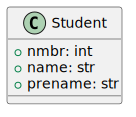

In [12]:
%%plantuml
@startuml
class Student {
    + nmbr: int
    + name: str
    + prename: str
}
@enduml